## Support Vector Classification (SVC)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.svm as svm 
import sklearn.metrics as mt 
from sklearn.model_selection import cross_val_score, cross_validate
import sklearn.datasets as d
import optuna
import warnings
import sklearn 
from mlxtend.plotting import plot_decision_regions 

c:\Users\JUNGINKIM\anaconda3\envs\class\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## breast_cancer 데이터 셋 로드 
x = d.load_breast_cancer()

cancer = pd.DataFrame(data=x.data,columns=x.feature_names)
cancer['target']=x.target

X = cancer.iloc[:,:-1]
y = cancer['target']

## row 수: 569 / columns 수: 31 / 타겟 변수 클래스: [0,1] 
## 유방암 진단을 위한 데이터 셋이며 30개의 독립변수를 통해 유방암 진단을 결정
print(x.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
## linear로 선형 분리 진행 
svm_clf = svm.SVC(kernel='linear')

## 교차 검증 진행 
print(pd.DataFrame(cross_validate(svm_clf,X,y,cv=6)))

print('교차 검증 결과 평균:', cross_val_score(svm_clf,X,y,cv=6).mean())

   fit_time  score_time  test_score
0  0.509360    0.001000    0.968421
1  1.618746    0.001000    0.905263
2  0.568252    0.002030    0.957895
3  1.022619    0.001005    0.957895
4  0.308602    0.001004    0.936842
5  0.682040    0.001537    0.968085
교차 검증 결과 평균: 0.9490668159761105


In [4]:
## Kernel trick (polynomial kernel) 사용해 비선형 분리 진행 
svm_clf_poly=svm.SVC(kernel='poly')

## 교차 검증 진행
print(pd.DataFrame(cross_validate(svm_clf_poly,X,y,cv=6)))

print('교차 검증 결과 평균:', cross_val_score(svm_clf_poly,X,y,cv=6).mean())

   fit_time  score_time  test_score
0  0.003999    0.000972    0.863158
1  0.003028    0.002000    0.842105
2  0.002970    0.001918    0.926316
3  0.002999    0.000999    0.936842
4  0.002999    0.000973    0.957895
5  0.003000    0.001000    0.925532
교차 검증 결과 평균: 0.9086412840612169


선형 분리, 비선형 분리 svm을 load_breast_cancer() 데이터 셋을 사용해 확인해 본 결과 해당 데이터 셋에서는 선형 분리가 더 적합한 것으로 확인되었다. 다음으로 Optuna를 사용해 최적의 하이퍼 파라미터 탐색을 진행한다

In [6]:
## 선형 분리에서 적절한 C값 탐색 진행
warnings.filterwarnings('ignore')

def objective(trial):
    x = d.load_breast_cancer()
    X,y = x.data, x.target 

    svc_c = trial.suggest_float('C',1e-4,1e2,log=True)
    classifier_obj = svm.SVC(C=svc_c, gamma='auto',kernel='linear')
    
    X_train,X_val,y_train,y_val = sklearn.model_selection.train_test_split(X,y,random_state=0)
    classifier_obj.fit(X_train,y_train)
    y_pred = classifier_obj.predict(X_val)

    accuracy = sklearn.metrics.accuracy_score(y_val,y_pred,normalize=True)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

[I 2022-10-25 16:55:07,938] A new study created in memory with name: no-name-2146c503-eee6-4e26-bf9e-28ca717bea00
[I 2022-10-25 16:55:08,093] Trial 0 finished with value: 0.9300699300699301 and parameters: {'C': 0.17688608752314094}. Best is trial 0 with value: 0.9300699300699301.
[I 2022-10-25 16:55:08,157] Trial 1 finished with value: 0.9300699300699301 and parameters: {'C': 0.05106108477011767}. Best is trial 0 with value: 0.9300699300699301.
[I 2022-10-25 16:55:08,168] Trial 2 finished with value: 0.9370629370629371 and parameters: {'C': 0.0003213198875056803}. Best is trial 2 with value: 0.9370629370629371.
[I 2022-10-25 16:55:08,179] Trial 3 finished with value: 0.9300699300699301 and parameters: {'C': 0.0023942821881299953}. Best is trial 2 with value: 0.9370629370629371.
[I 2022-10-25 16:55:08,189] Trial 4 finished with value: 0.9370629370629371 and parameters: {'C': 0.0003662129577948169}. Best is trial 2 with value: 0.9370629370629371.
[I 2022-10-25 16:55:08,455] Trial 5 fini

In [8]:
print('100번의 trial 중 최적의 하이퍼 파라미터:',study.best_trial.params)
print('100번의 trial 중 가장 높은 accuracy:',study.best_trial.value)

100번의 trial 중 최적의 하이퍼 파라미터: {'C': 36.60317395134434}
100번의 trial 중 가장 높은 accuracy: 0.972027972027972


In [2]:
## 비선형 분리에서 적절한 C값 탐색 진행
warnings.filterwarnings('ignore')

def objective_poly(trial):
    x = d.load_breast_cancer()
    X,y = x.data, x.target 

    svc_c = trial.suggest_float('C',1e-4,1e-2,log=True)
    svc_degree = trial.suggest_int('degree',3,5,step=1)
    # svc_gamma = trial.suggest_categorical('svc_gamma',['scale','auto'])
    svc_coef = trial.suggest_float('coef0',0.0,0.3,step=0.1)

    classifier_obj_non = svm.SVC(C=svc_c, gamma='auto',degree=svc_degree,coef0=svc_coef,kernel='poly')
    
    X_train,X_val,y_train,y_val = sklearn.model_selection.train_test_split(X,y,random_state=0)
    classifier_obj_non.fit(X_train,y_train)
    y_pred = classifier_obj_non.predict(X_val)

    accuracy = sklearn.metrics.accuracy_score(y_val,y_pred,normalize=True)
    return accuracy

study_non = optuna.create_study(direction='maximize')
study_non.optimize(objective_poly,n_trials=100)

[I 2022-10-25 20:33:02,920] A new study created in memory with name: no-name-db1cacf4-7205-47d8-90b9-26915b63d400


## PCA 진행 및 plot 그리기

In [66]:
## plot function 
def showplt(x,y,svm1,title):

    plt.scatter(x[:,0],x[:,1], c=y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm1.decision_function(xy).reshape(XX.shape)

    #margins,decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

    #Support Vector
    ax.scatter(svm1.support_vectors_[:,0], svm1.support_vectors_[:,1], s=60, facecolors='r')
    plt.title(title)
    plt.show()

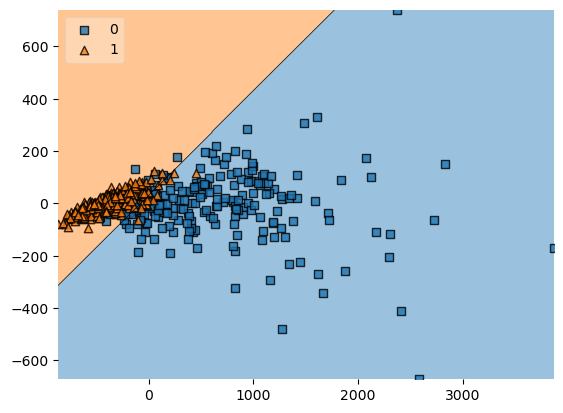

In [68]:
from sklearn.decomposition import PCA

model_best_params = study.best_params
model_best_params['C'] = model_best_params.pop('svc_c')
model_best_params['kernel'] = 'linear'
model_best_params['gamma'] = 'auto'

model = svm.SVC(**model_best_params)
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

model.fit(pca_X,y)

plot_decision_regions(X=pca_X,y=y.values, clf=model, legend=2)
plt.show()

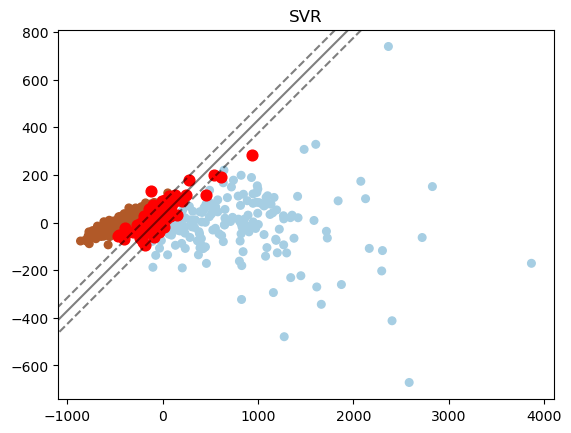

In [69]:
showplt(pca_X,y,model,'SVR')

## 결론
- 선형 분리, 비선형 분리 svm을 load_breast_cancer() 데이터 셋을 활용해 분류 과제를 진행하였다. 먼저 교차 검증을 통해 해당 데이터 셋이 선형 분리에 더 적합하다는 것을 확인하였고 이후 optuna를 사용해 하이퍼 파라미터 튜닝을 진행했다. 선형 분리에서는 C(cost)만을 tuning하여 accuracy가 가장 높은 값을 가지는 C값을 탐색했고 그 때의 최적의 값은 42.69이고 accuracy는 0.97이 나오는 것을 확인한다. 반면에 비선형 분리에서는 polynomial kernel을 사용하였고 동일하게 optuna를 사용하여 hyperparameter(C, degree) tuning을 진행했다. 선형 분리때와 동일하게 accuracy가 가장 높은 값을 가지는 C, degree를 탐색하였고 그 때 최적의 값은 각 각 _,_이고 accuaracy는 _이 나오는 것을 확인하였다.